## Times Series Forecasting with Gaussian Processes

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import linregress, t
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [219]:
data = pd.read_csv('./new_data/reshaped.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')

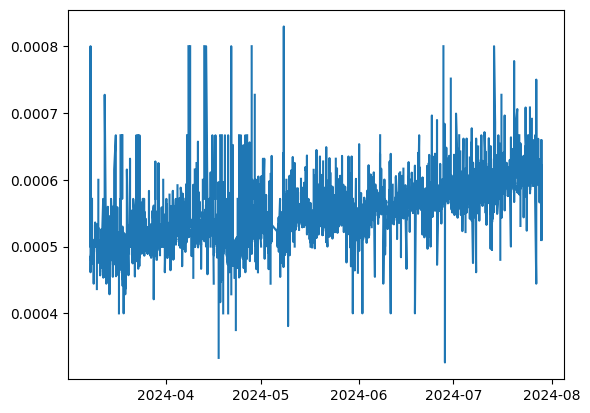

In [220]:
data['R_normal_median'] = data[['R_normal_2', 'R_normal_3', 'R_normal_4', 'R_normal_5', 'R_normal_6', 'R_normal_8', 'R_normal_9', 'R_normal_10']].mean(axis=1)
plt.plot(data.index, data['R_normal_median'])

In [221]:
ts = data['R_normal_median'].resample('D').mean()
ts.dropna(inplace=True)


In [222]:
start_date = ts.index.min()
X = (ts.index - start_date).days
X = X.values.reshape(-1, 1)
Y = ts.values
print(X)
print(Y)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]]
[0.00

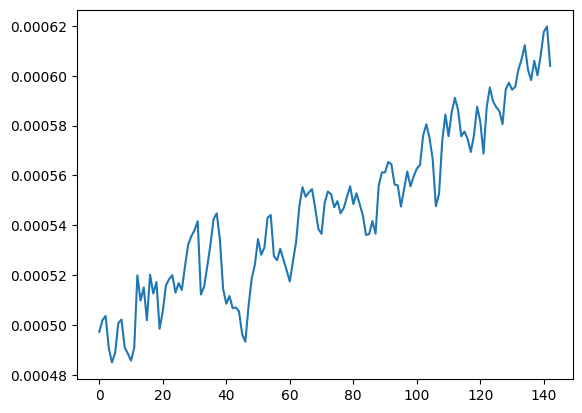

In [223]:
plt.plot(X, Y)

In [246]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared,RationalQuadratic, WhiteKernel

long_term_trend_kernel = 100.0**2 * RBF(length_scale=30.0)
seasonal_kernel = (3.0**2 * RBF(length_scale=20.0) * ExpSineSquared(length_scale=10.0, periodicity=30.0))
irregularity_kernel = 0.5**2 * RationalQuadratic(length_scale=5.0, alpha=0.1)
noise_kernel = 0.05**2 * RBF(length_scale=0.5) + WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5))

final_kernel = long_term_trend_kernel + seasonal_kernel + irregularity_kernel
final_kernel

100**2 * RBF(length_scale=30) + 3**2 * RBF(length_scale=20) * ExpSineSquared(length_scale=10, periodicity=30) + 0.5**2 * RationalQuadratic(alpha=0.1, length_scale=5)

In [247]:
print(X)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]]


In [248]:
from sklearn.gaussian_process import GaussianProcessRegressor

y_mean = Y.mean()
gaussian_process = GaussianProcessRegressor(kernel=final_kernel, normalize_y=False)
gaussian_process.fit(X, Y - y_mean)

GaussianProcessRegressor(kernel=100**2 * RBF(length_scale=30) + 3**2 * RBF(length_scale=20) * ExpSineSquared(length_scale=10, periodicity=30) + 0.5**2 * RationalQuadratic(alpha=0.1, length_scale=5))

In [ ]:
today = datetime.now()

days_diff = (today - start_date).days



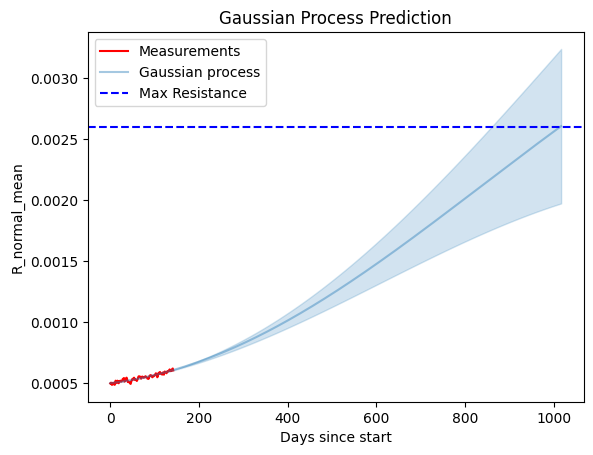

The date when the resistance level of 0.0026 is reached is [2.78356164] years since start.


In [283]:
max_resistance = 0.0026
num_pred = 20
X_test = np.linspace(start=0, stop=days_diff, num=num_pred).reshape(-1, 1)
mean_y_pred, std_y_pred = gaussian_process.predict(X_test, return_std=True)

forecasted_dates = []
forecasted_values = []

while mean_y_pred[-1] < max_resistance:
    next_step = np.linspace(X_test[-1], X_test[-1] + 30, 11)[1:].reshape(-1, 1)
    X_test = np.vstack([X_test, next_step]) 
    
    mean_y_pred, std_y_pred = gaussian_process.predict(X_test, return_std=True)
    mean_y_pred += y_mean
    
    if mean_y_pred[-1] >= max_resistance:
        break 

plt.plot(X,Y, color='red', label='Measurements')
plt.plot(X_test, mean_y_pred, color='tab:blue', alpha=0.4, label='Gaussian process')
plt.fill_between(X_test.ravel(), mean_y_pred - std_y_pred, mean_y_pred + std_y_pred, color='tab:blue', alpha=0.2)
plt.axhline(y=max_resistance, color='blue', linestyle='--', label='Max Resistance')
plt.legend()
plt.xlabel('Days since start')
plt.ylabel('R_normal_mean')
plt.title('Gaussian Process Prediction')
plt.show()

print(f"The date when the resistance level of {max_resistance} is reached is {X_test[-1]/365} years since start.")


In [278]:
gaussian_process.kernel_

0.00316**2 * RBF(length_scale=1e+05) + 0.00316**2 * RBF(length_scale=1.19e+03) * ExpSineSquared(length_scale=9.97e+03, periodicity=1e+05) + 0.00316**2 * RationalQuadratic(alpha=1e+05, length_scale=1e+05)